In [7]:
import numpy as np
import matplotlib.pyplot as plt



In [8]:
import numpy as np

def euler(f, y0, t):
    """ Euler method for solving systems of first order ODEs.
        f  : system of differential equations (as a function)
        y0 : initial state
        t  : array of time points
    """
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i - 1]
        y[i] = y[i - 1] + f(y[i - 1], t[i - 1]) * dt
    return y


In [9]:
from scipy.integrate import solve_ivp

def runge_kutta(f, y0, t):
    """ Fourth order Runge-Kutta method using scipy's solve_ivp.
        f  : system of differential equations (as a function)
        y0 : initial state
        t  : array of time points
    """
    sol = solve_ivp(f, [t[0], t[-1]], y0, t_eval=t, method='RK45', rtol=1e-6, atol=1e-9)
    return sol.y.T


In [10]:
def leapfrog(f, y0, t):
    """ Leapfrog method for solving systems of first order ODEs.
        This method is particularly suited for Hamiltonian systems.
        f  : system of differential equations (as a function)
        y0 : initial state (y0 should include both position and velocity)
        t  : array of time points
    """
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    dt = t[1] - t[0]  # Assuming uniform spacing
    # Start with a half step for velocity
    v_half = y[0][1] + 0.5 * dt * f(y[0], t[0])[1]
    for i in range(1, n):
        y[i][0] = y[i-1][0] + dt * v_half  # Update position full step
        v_full = v_half + dt * f(y[i], t[i])[1]  # Update velocity full step
        if i < n - 1:
            y[i+1][1] = v_full + 0.5 * dt * f(y[i], t[i])[1]  # Prepare next half step
        v_half = v_full
    return y


In [11]:
def lorenz_system(state, t):
    sigma, beta, rho = 10, 2.667, 28
    x, y, z = state
    return np.array([
        sigma * (y - x),
        x * (rho - z) - y,
        x * y - beta * z
    ])

# Initial conditions and time array
y0 = np.array([0.0, 1.0, 1.05])
t = np.linspace(0, 2, 1000)  # Time from 0 to 2 seconds, 1000 points

# Solve using each method
y_euler = euler(lorenz_system, y0, t)
y_rk = runge_kutta(lorenz_system, y0, t)
# Leapfrog example omitted as it requires adaptation for the Lorenz system specifically.


TypeError: cannot unpack non-iterable float object

$$\frac{dx^2}{dt} +x = 0$$

In [ ]:
x = [1]
dx = [0]
t = np.arange(0.0, 30, 0.1)
spacing = 0.1

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/error_convergence_plot.png'

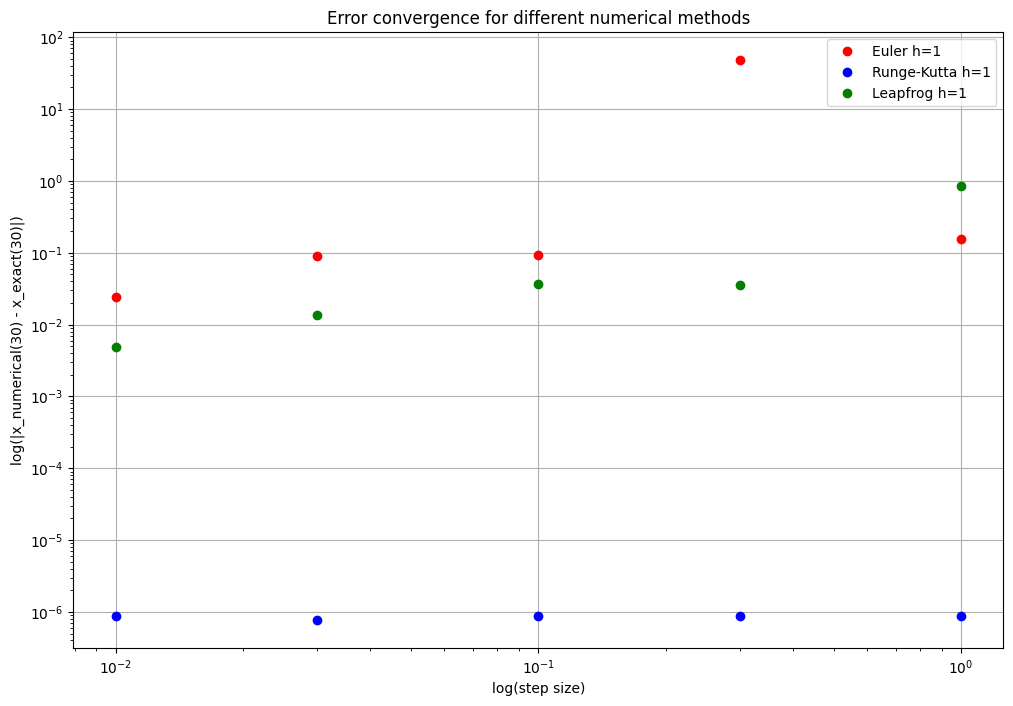

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def system_of_equations(t, y):
    return [y[1], -y[0]]

def euler_method(system, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i - 1]
        y[i] = y[i - 1] + np.array(system(t[i - 1], y[i - 1])) * dt
    return y[:, 0]

def runge_kutta_fixed_step(system, y0, t):
    sol = solve_ivp(system, [t[0], t[-1]], y0, t_eval=t, method='RK45', rtol=1e-6, atol=1e-9)
    return sol.y[0]

def leapfrog_method(system, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    dt = t[1] - t[0]
    v = y0[1]
    for i in range(1, len(t)):
        y[i, 0] = y[i-1, 0] + v * dt
        a = -y[i, 0]
        v = v + a * dt
        y[i, 1] = v
    return y[:, 0]

step_sizes = [1, 0.3, 0.1, 0.03, 0.01]
t_end = 30

plt.figure(figsize=(12, 8))

for h in step_sizes:
    t_points = np.arange(0, t_end + h, h)

    y_euler = euler_method(system_of_equations, [1, 0], t_points)
    y_runge_kutta = runge_kutta_fixed_step(system_of_equations, [1, 0], t_points)
    y_leapfrog = leapfrog_method(system_of_equations, [1, 0], t_points)
    y_exact = np.cos(t_points)

    error_euler = np.abs(y_euler[-1] - y_exact[-1])
    error_runge_kutta = np.abs(y_runge_kutta[-1] - y_exact[-1])
    error_leapfrog = np.abs(y_leapfrog[-1] - y_exact[-1])

    plt.loglog(h, error_euler, 'ro', label=f'Euler h={h}' if h == step_sizes[0] else "")
    plt.loglog(h, error_runge_kutta, 'bo', label=f'Runge-Kutta h={h}' if h == step_sizes[0] else "")
    plt.loglog(h, error_leapfrog, 'go', label=f'Leapfrog h={h}' if h == step_sizes[0] else "")

plt.xlabel('log(step size)')
plt.ylabel('log(|x_numerical(30) - x_exact(30)|)')
plt.legend()
plt.title('Error convergence for different numerical methods')
plt.grid(True)

plt.savefig('/mnt/data/error_convergence_plot.png')
plt.close()


## $\Phi = - \frac{1}{\sqrt{1+x^2+y^2}}$



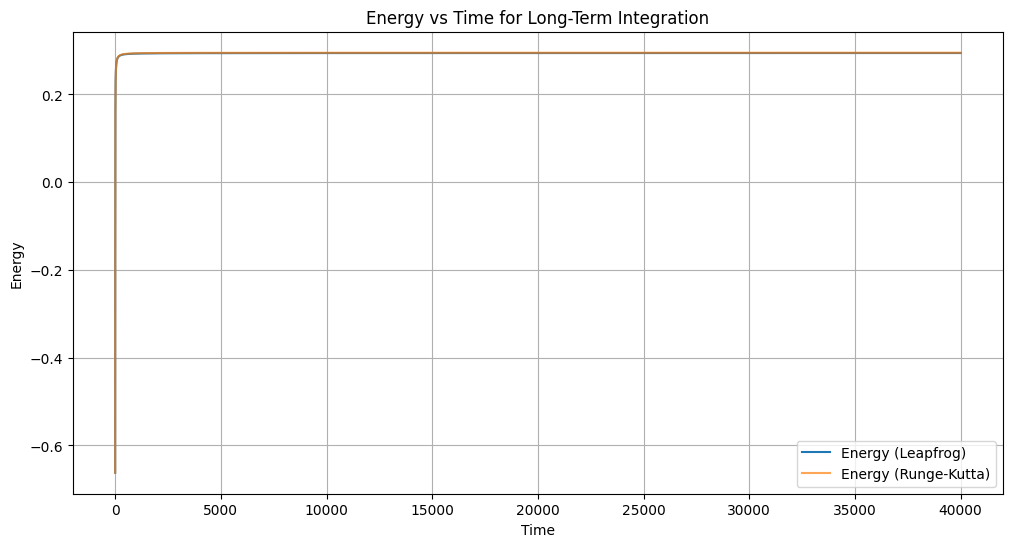

Leapfrog method took: 0.30 seconds
Runge-Kutta method took: 0.01 seconds


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

# Define the acceleration function from the potential
def acceleration(x, y):
    phi = -1 / np.sqrt(1 + x**2 + y**2)
    denom = (1 + x**2 + y**2) ** 1.5
    return [-x * phi / denom, -y * phi / denom]

# Leapfrog Method
def leapfrog_method(acc, y0, t):
    n = len(t)
    y = np.zeros((n, 4))
    y[0] = y0
    dt = t[1] - t[0]
    # Half-step for velocity
    vx_half = y0[2] + 0.5 * dt * acc(y0[0], y0[1])[0]
    vy_half = y0[3] + 0.5 * dt * acc(y0[0], y0[1])[1]

    for i in range(1, n):
        y[i, 0] = y[i-1, 0] + dt * vx_half
        y[i, 1] = y[i-1, 1] + dt * vy_half
        ax, ay = acc(y[i, 0], y[i, 1])
        vx_full = vx_half + dt * ax
        vy_full = vy_half + dt * ay
        vx_half = vx_full
        vy_half = vy_full
        y[i, 2] = vx_full
        y[i, 3] = vy_full

    return y

# Runge-Kutta Method
def runge_kutta_method(acc, y0, t):
    sol = solve_ivp(
        lambda t, y: [y[2], y[3], *acc(y[0], y[1])],
        [t[0], t[-1]],
        y0,
        t_eval=t,
        method='RK45',
        rtol=1e-6,
        atol=1e-9
    )
    return sol.y.T

# Calculate the energy of the system
def energy(y, acc):
    vx, vy = y[:, 2], y[:, 3]
    kinetic = 0.5 * (vx**2 + vy**2)
    potential_energy = np.array([-1 / np.sqrt(1 + x**2 + y**2) for x, y in zip(y[:, 0], y[:, 1])])
    return kinetic + potential_energy

# Initial conditions
y0 = [1.0, 0.0, 0.0, -0.3]  # [x, y, vx, vy]

# Time points for long-term simulation
t_max_long = 40000
t_points_long = np.arange(0, t_max_long, 0.4)

# Measure the wall clock time for the Leapfrog method
start_time_leapfrog = time.time()
y_leapfrog_long = leapfrog_method(acceleration, y0, t_points_long)
end_time_leapfrog = time.time()

# Measure the wall clock time for the Runge-Kutta method
start_time_rk = time.time()
y_runge_kutta_long = runge_kutta_method(acceleration, y0, t_points_long)
end_time_rk = time.time()

# Compute the energy for both methods
energy_leapfrog_long = energy(y_leapfrog_long, acceleration)
energy_rk_long = energy(y_runge_kutta_long, acceleration)

# Compute the wall clock time for each method
wall_time_leapfrog = end_time_leapfrog - start_time_leapfrog
wall_time_rk = end_time_rk - start_time_rk

# Plot the energy vs time for both methods
plt.figure(figsize=(12, 6))
plt.plot(t_points_long, energy_leapfrog_long, label='Energy (Leapfrog)')
plt.plot(t_points_long, energy_rk_long, label='Energy (Runge-Kutta)', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time for Long-Term Integration')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

# The wall clock times are:
print(f"Leapfrog method took: {wall_time_leapfrog:.2f} seconds")
print(f"Runge-Kutta method took: {wall_time_rk:.2f} seconds")
